# <span style = "background-color: #FFDDDD"> 케라스 창시자에게 배우는 딥러닝</span>

---
## <span style = "background-color: #FFFFDD"> 🌃 Introduction</span>

### <span style = "background-color: #F0E9FF"> 📝 Requirements</span>

**[준비물]**
- 데이터 Motorcycle Night Ride (Semantic Segmentation)
- 아래 링크에서 데이터셋을 다운로드 받습니다
    - https://www.kaggle.com/datasets/sadhliroomyprime/motorcycle-night-ride-semantic-segmentation
- 이번 퀘스트에는 별도의 노드를 제공하지 않습니다
    - 로컬, google colab, lms 프로젝트 스테이지(EX 14, 16 등)을 사용해주세요

**[문제개요]**

1. 이미지 세그멘테이션 모델을 마들고, 전체 코드와 분류 결과를 주피터 노트북 파일로 자신의 깃헙에 제출합니다. (2+1점)
  - 이미지 데이터를 적절히 전처리 한 후 데이터 파이프라인을 설계합니다.
  - 모델은 U-Net으로 고정합니다. 올바른 훈련 진행을 위해 원본에서 변경이 필요할 수 있습니다. (고정된 모델 이외에 추가 모델 적용 시 채점에 반영)
  - 텐서플로우 라이브러리에서 모델을 불러오지 않고, 직접 모델 학습 코드를 짜야 합니다.
  - Data augmentation 등 케창딥에서 배운 모든 방법을 사용해 최고 기록을 달성해보세요.
  데이터와 모델, Metric 결과 등을 상세하게 분석할 경우, 추가 점수가 부여됩니다.

2. 이미지 분할 학습 결과를 텐서보드로 시각화합니다. (2점)
  - tensorboard.dev를 사용해 텐서보드 결과를 공유할 수 있는 url 주소 링크를 자신의 깃헙 **Main_Quest_2** 폴더 내의 **Readme.md** 파일에 게시합니다.
  - 참고
    - [Huggingface - Training metric 공유](https://www.youtube.com/watch?v=7eaBs2BAdPI)
    - [HuggingFace - Keras model upload](https://www.youtube.com/watch?v=s95A-au3vsM)

**[배점]**
- 최대 점수는 **5점** 입니다.
- **1번 문제 : 2점 (+ 1점)**
    - 퍼실 채점 결과 상세한 분석과 모델 개선 작업을 수행한 **4분** 을 선정하여 **추가 점수 +1점** 을 부여합니다.
- **2번 문제 : 2점**

**[제출]**
  - 제출기한 : **18:00** 까지
  - 제출방법 : 리서치게시판->아이펠 29기 명단에 깃헙 주소를 제출
  - 깃헙 폴더 파일명 : **Main_Quest_2**
  - 주피터 노트북 파일 명 :
    - **{본인이름}_Night_Ride_Image_segmentation.ipynb**
    - 제출 양식을 지키지 않으면 채점 대상에서 제외됩니다.
    - 제출 시간을 지키지 않으면 채점 대상에서 제외됩니다.

### <span style = "background-color: #F0E9FF"> 📝 Assignment Overview</span>

**1. Introduction**
  - 문제 요구사항 분석
  - 제출 내용 구성 요약

**2. Environment Settings**
  - 퀘스트 수행을 위한 각종 라이브러리/패키지 설치
  - 퀘스트 수행을 위한 각종 변수/함수 사전 정의 

**3. Data Preparation**
  - 데이터 불러오기
  - 데이터 전처리
  - 데이터 분할
  - 데이터 확인

**4. Model Construction**
  - U-net 모델 구조 분석
  - U-net 모델 구현

**5. Experiments**
  - 모델 학습 환경 설정
  - 모델 학습 수행

**6. Evaluation**

**7. Conclusion**
  - 연구노트(회고록)
  - 퀘스트 수행을 위한 각종 참조 논문 및 사이트

---
## <span style = "background-color: #FFFFDD"> 🌃 Environment Settings</span>

### <span style = "background-color: #F0E9FF"> 1. Import useful libraries & packages</span>

In [1]:
# import useful tools
import random
import os


# import data tools
import numpy as np


# import visualization tools
import matplotlib.pyplot as plt    # visualize data / preview of image data
from IPython.display import SVG    # visualize model structure


# import DL tools
import tensorflow as tf
import tensorflow.keras as keras

import tensorflow.keras.layers as layers    # set layers within learning model
import tensorflow.keras.models as models    # build learning model structure

from tensorflow.keras.utils import load_img, img_to_array    # handle image data files
from tensorflow.keras.utils import model_to_dot    # visualize model structure

from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint    # callback methods

### <span style = "background-color: #F0E9FF"> 2. Define constants</span>

In [2]:
# dataset path
IMG_PATH = os.path.join(os.getenv('HOME'), 'aiffel/quest/Main_Quest_2/dataset/*')

# total count of image data files
TOTAL_SAMPLES_CNT = 200    # 200 sets of (original + segmented + merged) image files
TOTAL_CLASSES_CNT = 6      # 6 types of objects are segemented in dataset

# size of image data files
ORIGINAL_IMG_WIDTH = 1920
ORIGINAL_IMG_HEIGHT = 1080
ORIGINAL_IMG_SIZE = (ORIGINAL_IMG_WIDTH, ORIGINAL_IMG_HEIGHT)

In [3]:
# data parameters
POOLING_DEPTH = 4    # defined by U-net structure
RESHAPED_IMG_WIDTH = ORIGINAL_IMG_WIDTH // POOLING_DEPTH
RESHAPED_IMG_HEIGHT = ORIGINAL_IMG_HEIGHT // POOLING_DEPTH + 2    # 원활한 pooling을 위해 4의 배수로 맞춤
RESHAPED_IMG_SIZE = (RESHAPED_IMG_HEIGHT, RESHAPED_IMG_WIDTH)

SHUFFLE_RAND_SEED = 1337

In [4]:
# machine learning parameters

# split samples
TRAIN_SAMPLES_CNT = int(TOTAL_SAMPLES_CNT * 0.6)
VAL_SAMPLES_CNT = int(TOTAL_SAMPLES_CNT * 0.2)
TEST_SAMPLES_CNT = TOTAL_SAMPLES_CNT - (TRAIN_SAMPLES_CNT + VAL_SAMPLES_CNT)

# training parameters
EPOCHS = 10
BATCH_SIZE = 16

### <span style = "background-color: #F0E9FF"> 3. Define useful variables & methods</span>

In [5]:
DIVIDER_LEN = 80

def print_single_divider():
  print("-" * DIVIDER_LEN)

def print_couble_divider():
  print("=" * DIVIDER_LEN)

---
## <span style = "background-color: #FFFFDD"> 🌃 Data Preparation</span>

### <span style = "background-color: #F0E9FF"> 1. Load data</span>

**1-1. data description**

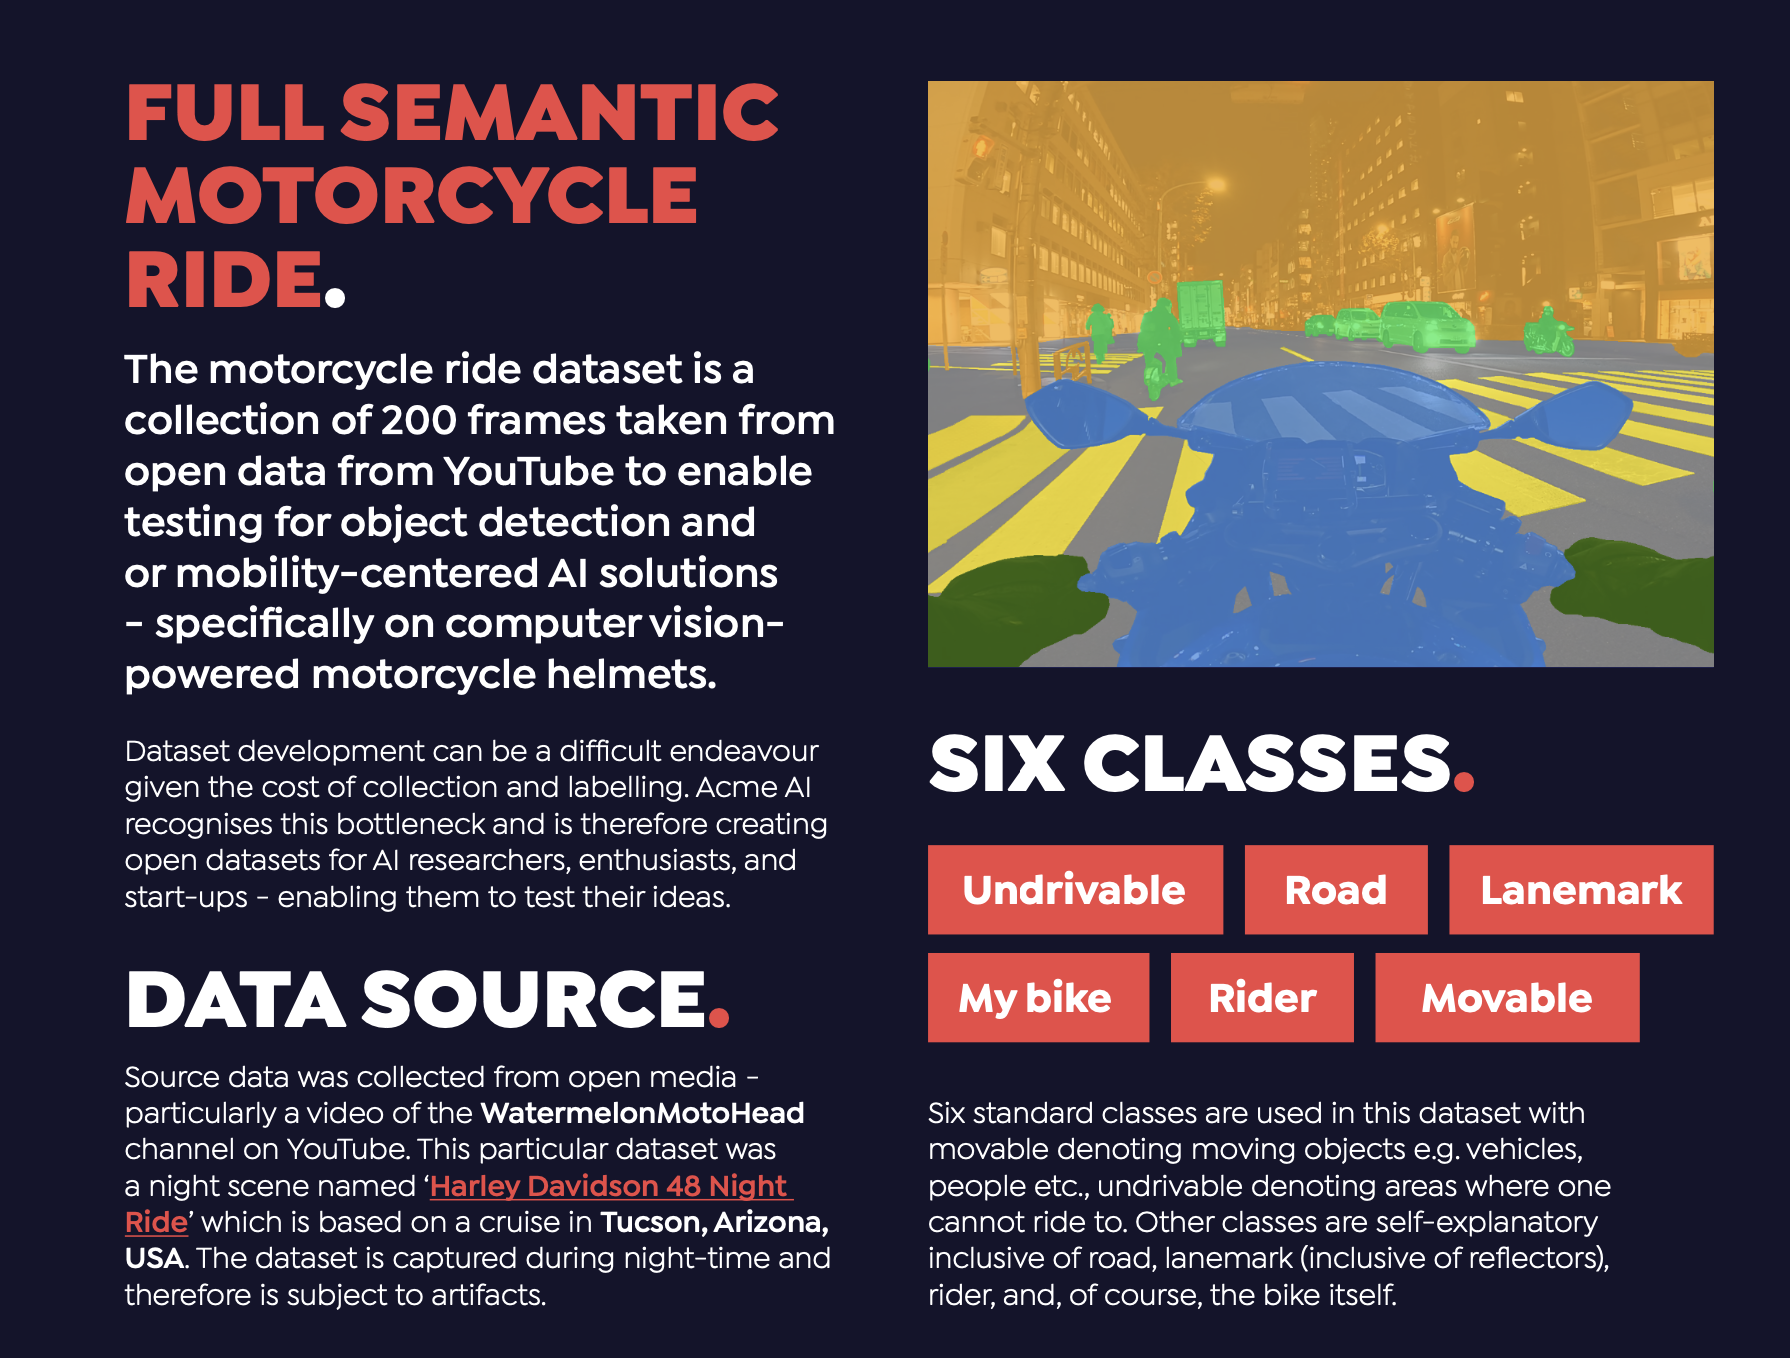

**1-2. data load**

In [6]:
# get filenames of image data files
img_filenames = tf.io.gfile.glob(IMG_PATH)

original_img_filenames = sorted([filename for filename in img_filenames if ("___fuse" not in filename) and ("___save" not in filename)])
segmented_img_filenames = sorted([filename for filename in img_filenames if "___fuse" in filename])
merged_img_filenames = sorted([filename for filename in img_filenames if "___save" in filename])

In [7]:
# check the number of image data files
print("Total", len(img_filenames), "image data files are found!")

print_single_divider()
print(">>> ORIGINAL  image data files  : ", len(original_img_filenames))
print(">>> SEGMENTED image data files  : ", len(segmented_img_filenames))
print(">>> MERGED    image data files  : ", len(merged_img_filenames))

Total 600 image data files are found!
--------------------------------------------------------------------------------
>>> ORIGINAL  image data files  :  200
>>> SEGMENTED image data files  :  200
>>> MERGED    image data files  :  200


**1-3. data preview**

In [8]:
# define image display method
def preview_img_data(original_img_filenames, segmented_img_filenames, merged_img_filenames, preview_cnt):
    if len(original_img_filenames) == len(segmented_img_filenames) and len(original_img_filenames) == len(merged_img_filenames):
        total_samples_cnt = len(original_img_filenames)

        for cnt in range(preview_cnt):
            # get random sample number
            rand_idx = random.randint(0, total_samples_cnt -1)    

            fig = plt.figure(figsize=(15, 5))

            # preview of "original" image
            ax1 = plt.subplot(1, 3, 1)
            ax1.imshow(load_img(original_img_filenames[rand_idx]))
            ax1.set_title("original")
            ax1.axis("off")

            # preview of "segmented" image
            ax2 = plt.subplot(1, 3, 2)
            ax2.imshow(load_img(segmented_img_filenames[rand_idx]))
            ax2.set_title("segmented")
            ax2.axis("off")

            # preview of "merged" image
            ax3 = plt.subplot(1, 3, 3)
            ax3.imshow(load_img(merged_img_filenames[rand_idx]))
            ax3.set_title("merged")
            ax3.axis("off")

            fig.show()
            
    else:
        print("ERROR: The pairs of original, segmented, and merged images are not match!!!")

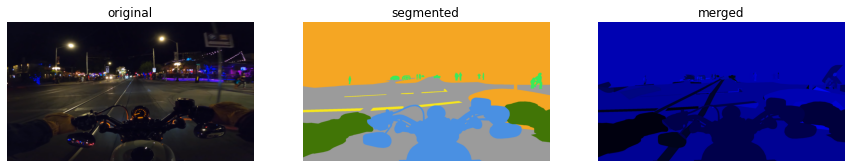

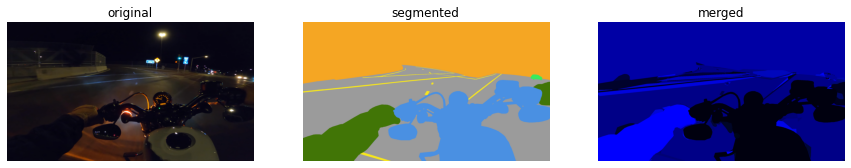

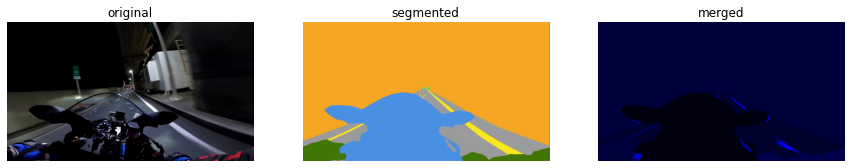

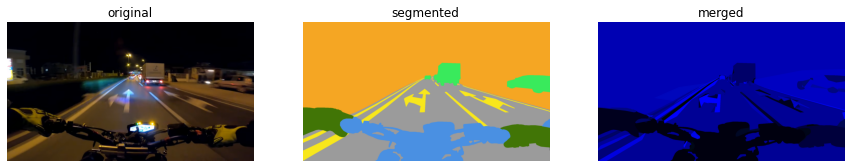

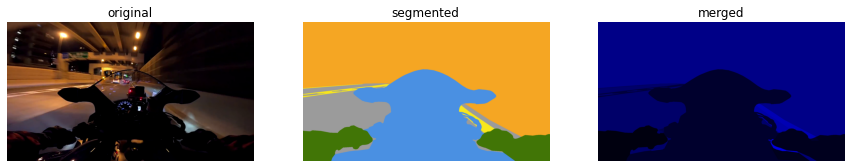

In [9]:
# preivew of image data files
preview_img_data(original_img_filenames, segmented_img_filenames, merged_img_filenames, 5)

In [10]:
# check the size of image data files
img_size = load_img(original_img_filenames[0]).size

# reset size constants
ORIGINAL_IMG_WIDTH = img_size[0]
ORIGINAL_IMG_HEIGHT = img_size[1]
ORIGINAL_IMG_SIZE = (ORIGINAL_IMG_WIDTH, ORIGINAL_IMG_HEIGHT)
print(">>> ORIGINAL image data file size  : ", ORIGINAL_IMG_SIZE)

# decide reshaped size constants
RESHAPED_IMG_WIDTH = ORIGINAL_IMG_WIDTH // POOLING_DEPTH
RESHAPED_IMG_HEIGHT = ORIGINAL_IMG_HEIGHT // POOLING_DEPTH + 2    # 원활한 pooling을 위해 4의 배수로 맞춤
RESHAPED_IMG_SIZE = (RESHAPED_IMG_HEIGHT, RESHAPED_IMG_WIDTH)
print(">>> RESHAPED image data file size  : ", RESHAPED_IMG_SIZE)

>>> ORIGINAL image data file size  :  (1920, 1080)
>>> RESHAPED image data file size  :  (272, 480)


### <span style = "background-color: #F0E9FF"> 2. Define pre-processing methods</span>

**2-1. convert segmentation color into class number**

In [11]:
# get colors used in target(segmented) image data
segmented_img_sample = img_to_array(load_img(segmented_img_filenames[0], color_mode="grayscale"))
segmented_img_sample = segmented_img_sample.astype("uint8")
segmentation_colors = np.unique(segmented_img_sample)

print("Total", len(segmentation_colors), "colors are used for segmentation : ", segmentation_colors)

Total 6 colors are used for segmentation :  [ 89 132 155 165 175 213]


In [12]:
# define dictionary to match (color code <-> class number)
color_to_class_dict = {np.uint(segmentation_colors[i]): np.uint(i) for i in range(len(segmentation_colors))}
print(">>> Dictionary to match from color code to class number : ", color_to_class_dict)

class_to_color_dict = {np.uint(i): np.uint(segmentation_colors[i]) for i in range(len(segmentation_colors))}
print(">>> Dictionary to match from class number to color code : ", class_to_color_dict)

>>> Dictionary to match from color code to class number :  {89: 0, 132: 1, 155: 2, 165: 3, 175: 4, 213: 5}
>>> Dictionary to match from class number to color code :  {0: 89, 1: 132, 2: 155, 3: 165, 4: 175, 5: 213}


**2-2. get array data from image data files**

In [13]:
# define method to get array data for original color images
def get_input_array_from_filename(filename, size):
    arr = img_to_array(load_img(filename, target_size=size))
    return arr

In [14]:
# define method to get array data for grayscaled segmented images
def get_target_array_from_filename(filename, size):
    # load target image data
    arr = img_to_array(load_img(filename, target_size=size, color_mode="grayscale"))
    arr = arr.astype("uint8")
    
    # convert segmentation color code into class number
    for color in segmentation_colors:
        arr = np.where(arr == color, color_to_class_dict[color], arr)
        
    return arr

In [15]:
# get array data from original image data files (not augmented)
original_input_img = np.zeros((TOTAL_SAMPLES_CNT,) + RESHAPED_IMG_SIZE + (3,), dtype="float32")    
original_target_img = np.zeros((TOTAL_SAMPLES_CNT,) + RESHAPED_IMG_SIZE + (1,), dtype="uint8")

for i in range(TOTAL_SAMPLES_CNT):
    original_input_img[i] = get_input_array_from_filename(original_img_filenames[i], RESHAPED_IMG_SIZE)
    original_target_img[i] = get_target_array_from_filename(segmented_img_filenames[i], RESHAPED_IMG_SIZE)
    
print("Array data for input & target images successfully generated!")

Array data for input & target images successfully generated!


**2-3. augmentation**

In [16]:
# implement here later...

### <span style = "background-color: #F0E9FF"> 3. Split & shuffle data</span>

**3-1. data shuffle**

In [17]:
random.Random(SHUFFLE_RAND_SEED).shuffle(original_input_img)
random.Random(SHUFFLE_RAND_SEED).shuffle(original_target_img)

print("Total", len(original_input_img), "image data samples are successfully shuffled!")

Total 200 image data samples are successfully shuffled!


**3-2. data split**

In [18]:
train_original_input_img = original_input_img[:TRAIN_SAMPLES_CNT]
train_original_target_img = original_target_img[:TRAIN_SAMPLES_CNT]

val_original_input_img = original_input_img[TRAIN_SAMPLES_CNT:TRAIN_SAMPLES_CNT + VAL_SAMPLES_CNT]
val_original_target_img = original_target_img[TRAIN_SAMPLES_CNT:TRAIN_SAMPLES_CNT + VAL_SAMPLES_CNT]

test_original_input_img = original_input_img[TRAIN_SAMPLES_CNT + VAL_SAMPLES_CNT:]
test_original_target_img = original_target_img[TRAIN_SAMPLES_CNT + VAL_SAMPLES_CNT:]



# check the number of image data files
print("Total", len(original_input_img), "image data samples are successfully split!")

print_single_divider()
print(">>> TRAIN      data samples  : ", len(train_original_input_img))
print(">>> VALIDATION data samples  : ", len(val_original_input_img))
print(">>> TEST       data samples  : ", len(test_original_input_img))

Total 200 image data samples are successfully split!
--------------------------------------------------------------------------------
>>> TRAIN      data samples  :  120
>>> VALIDATION data samples  :  40
>>> TEST       data samples  :  40


### <span style = "background-color: #F0E9FF"> 4. Preview data</span>

In [19]:
# This section is to preview original and augmented image data
# implement here later...

---
## <span style = "background-color: #FFFFDD"> 🌃 Model Construction</span>

### <span style = "background-color: #F0E9FF"> 1. Analyze U-net model structure</span>

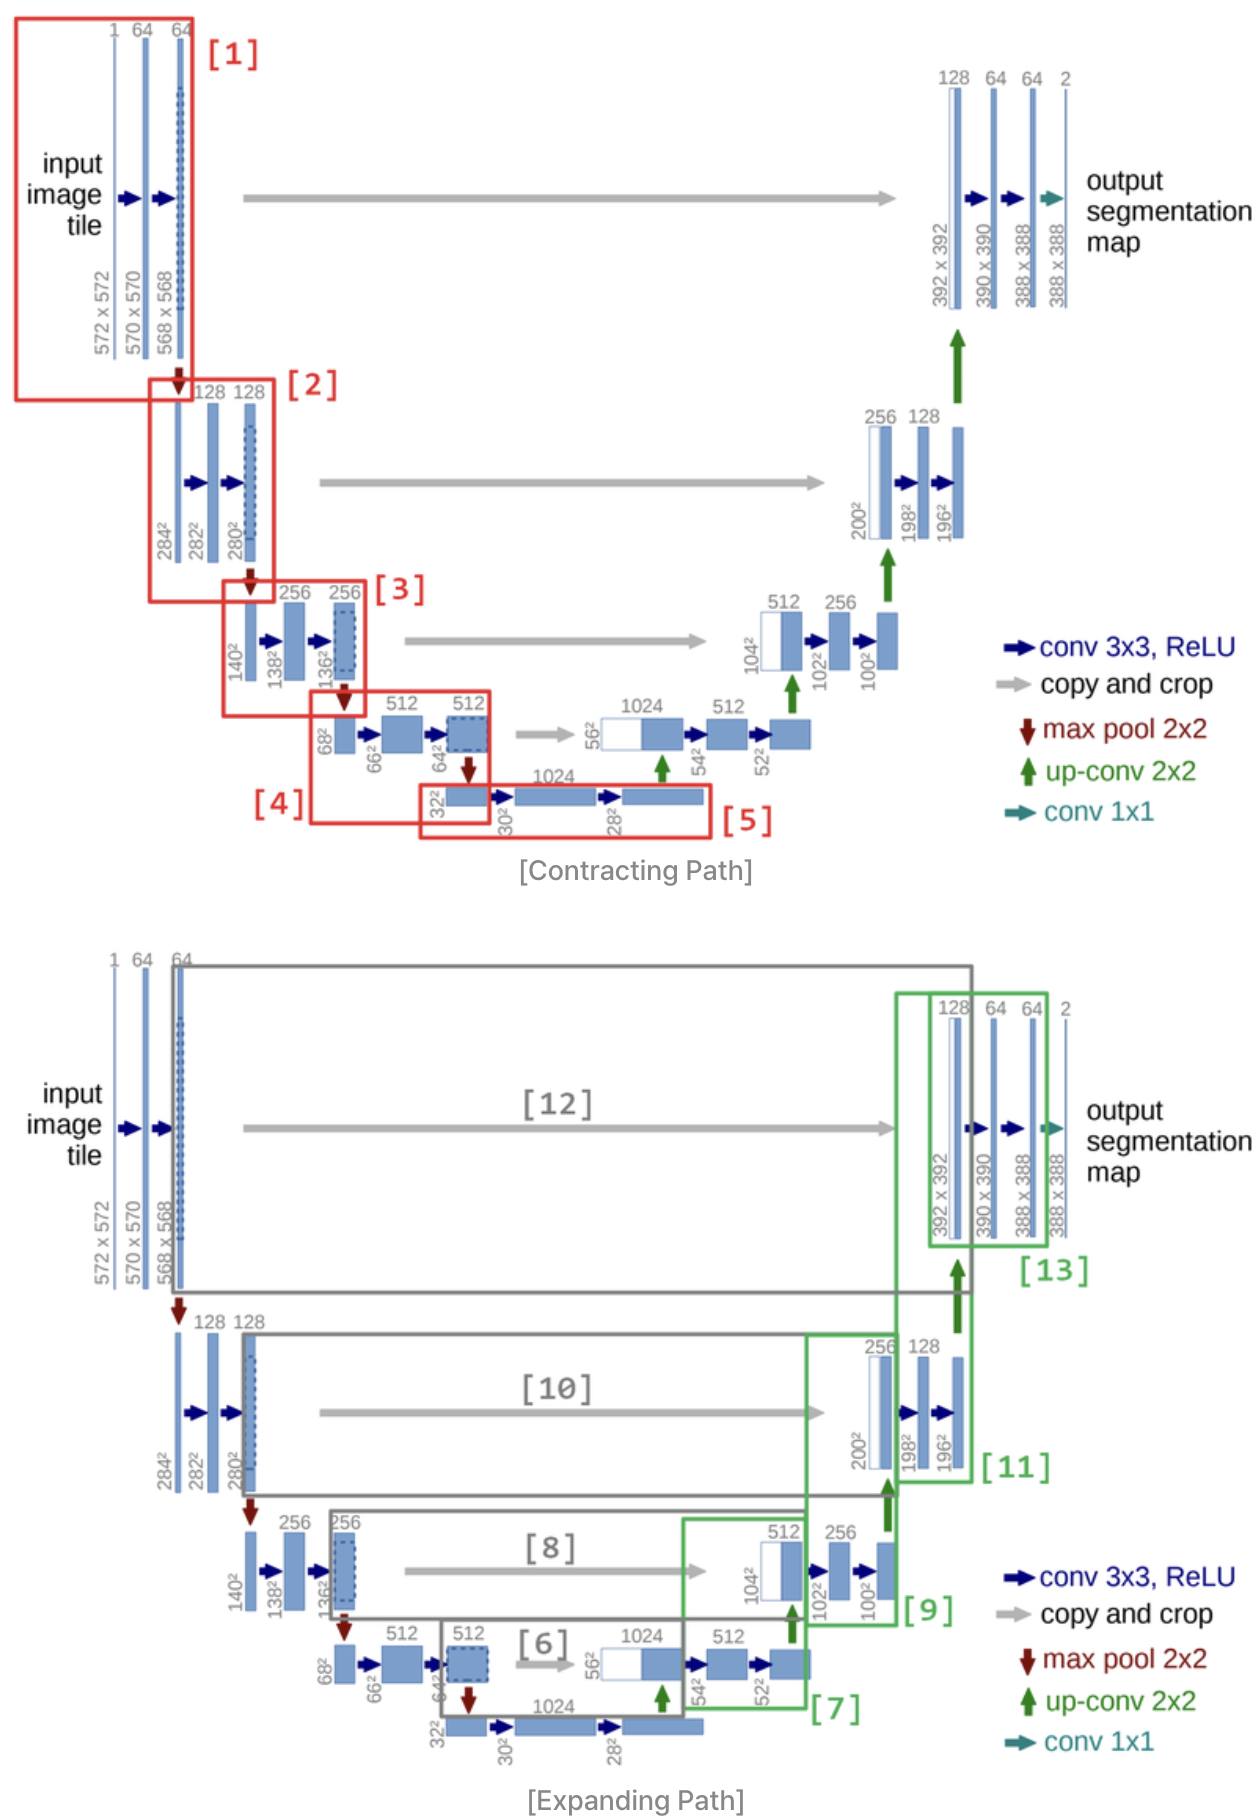

### <span style = "background-color: #F0E9FF"> 2. Implement U-net model</span>

**2-1. U-net model implementation**

In [20]:
def get_unet_model(input_shape, num_classes = TOTAL_CLASSES_CNT, augmentation = False):
    ### INPUT LAYER ###
    inputs = layers.Input(shape=input_shape + (3,))
    rescaled_inputs = layers.Rescaling(1./255)(inputs)
    
    
    
    ### CONTRACTING PATH ###
    # block [1]
    conv0 = layers.Conv2D(64, activation='relu', padding="same", kernel_size = 3)(rescaled_inputs)
    conv1 = layers.Conv2D(64, activation='relu', padding="same", kernel_size=3)(conv0)  # Skip connection으로 Expanding path로 이어질 예정
    conv2 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv1)

    # block [2]
    conv3 = layers.Conv2D(128, activation='relu', padding="same", kernel_size = 3)(conv2)
    conv4 = layers.Conv2D(128, activation='relu', padding="same", kernel_size = 3)(conv3)
    conv5 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv4)

    # block [3]
    conv6 = layers.Conv2D(256, activation='relu', padding="same", kernel_size = 3)(conv5)
    conv7 = layers.Conv2D(256, activation='relu', padding="same", kernel_size = 3)(conv6)
    conv8 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv7)

    # block [4]
    conv9 = layers.Conv2D(512, activation='relu', padding="same", kernel_size = 3)(conv8)
    conv10 = layers.Conv2D(512, activation='relu', padding="same", kernel_size = 3)(conv9)
    conv11 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv10)

    # block[5]
    conv12 = layers.Conv2D(1024, activation='relu', padding="same", kernel_size=3)(conv11)
    conv13 = layers.Conv2D(1024, activation='relu', padding="same", kernel_size=3)(conv12)



    ### EXPANDING PATH ###
    # block [6]
    trans01 = layers.Conv2DTranspose(512, kernel_size=2, strides=(2, 2), activation='relu', padding="same")(conv13)
    crop01 = layers.Cropping2D(cropping=((0, 0), (0, 0)))(conv10)
    concat01 = layers.concatenate([trans01, crop01], axis=-1)
    

    # block [7]
    conv14 = layers.Conv2D(512, activation='relu', padding="same", kernel_size=3)(concat01)
    conv15 = layers.Conv2D(512, activation='relu', padding="same", kernel_size=3)(conv14)
    trans02 = layers.Conv2DTranspose(256, kernel_size=2, strides=(2, 2), activation='relu', padding="same")(conv15)

    # block [8]
    crop02 = layers.Cropping2D(cropping=((0, 0), (0, 0)))(conv7)   
    concat02 = layers.concatenate([trans02, crop02], axis=-1)
    

    # block [9]
    conv16 = layers.Conv2D(256, activation='relu', padding="same", kernel_size=3)(concat02)
    conv17 = layers.Conv2D(256, activation='relu', padding="same", kernel_size=3)(conv16)
    trans03 = layers.Conv2DTranspose(128, kernel_size=2, strides=(2, 2), activation='relu', padding="same")(conv17)

    # block [10]
    crop03 = layers.Cropping2D(cropping=((0, 0), (0, 0)))(conv4)
    concat03 = layers.concatenate([trans03, crop03], axis=-1)

    # block [11]
    conv18 = layers.Conv2D(128, activation='relu', padding="same", kernel_size=3)(concat03)
    conv19 = layers.Conv2D(128, activation='relu', padding="same", kernel_size=3)(conv18)
    trans04 = layers.Conv2DTranspose(64, kernel_size=2, strides=(2, 2), activation='relu', padding="same")(conv19)

    # block [12]
    crop04 = layers.Cropping2D(cropping=((0, 0), (0, 0)))(conv1)
    concat04 = layers.concatenate([trans04, crop04], axis=-1)

    # block [13]
    conv20 = layers.Conv2D(64, activation='relu', padding="same", kernel_size=1)(concat04)
    conv21 = layers.Conv2D(64, activation='relu', padding="same", kernel_size=1)(conv20)

    
    
    ### OUTPUT LAYER ###
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(conv21)

    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="U-net")
    return model

**2-2. U-net model structure validation**

In [27]:
# generate U-net model instance for test
model = get_unet_model(RESHAPED_IMG_SIZE)

In [28]:
# print model structure
model.summary()

Model: "U-net"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 272, 480, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 272, 480, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 272, 480, 64) 1792        rescaling_1[0][0]                
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 272, 480, 64) 36928       conv2d_19[0][0]                  
______________________________________________________________________________________________

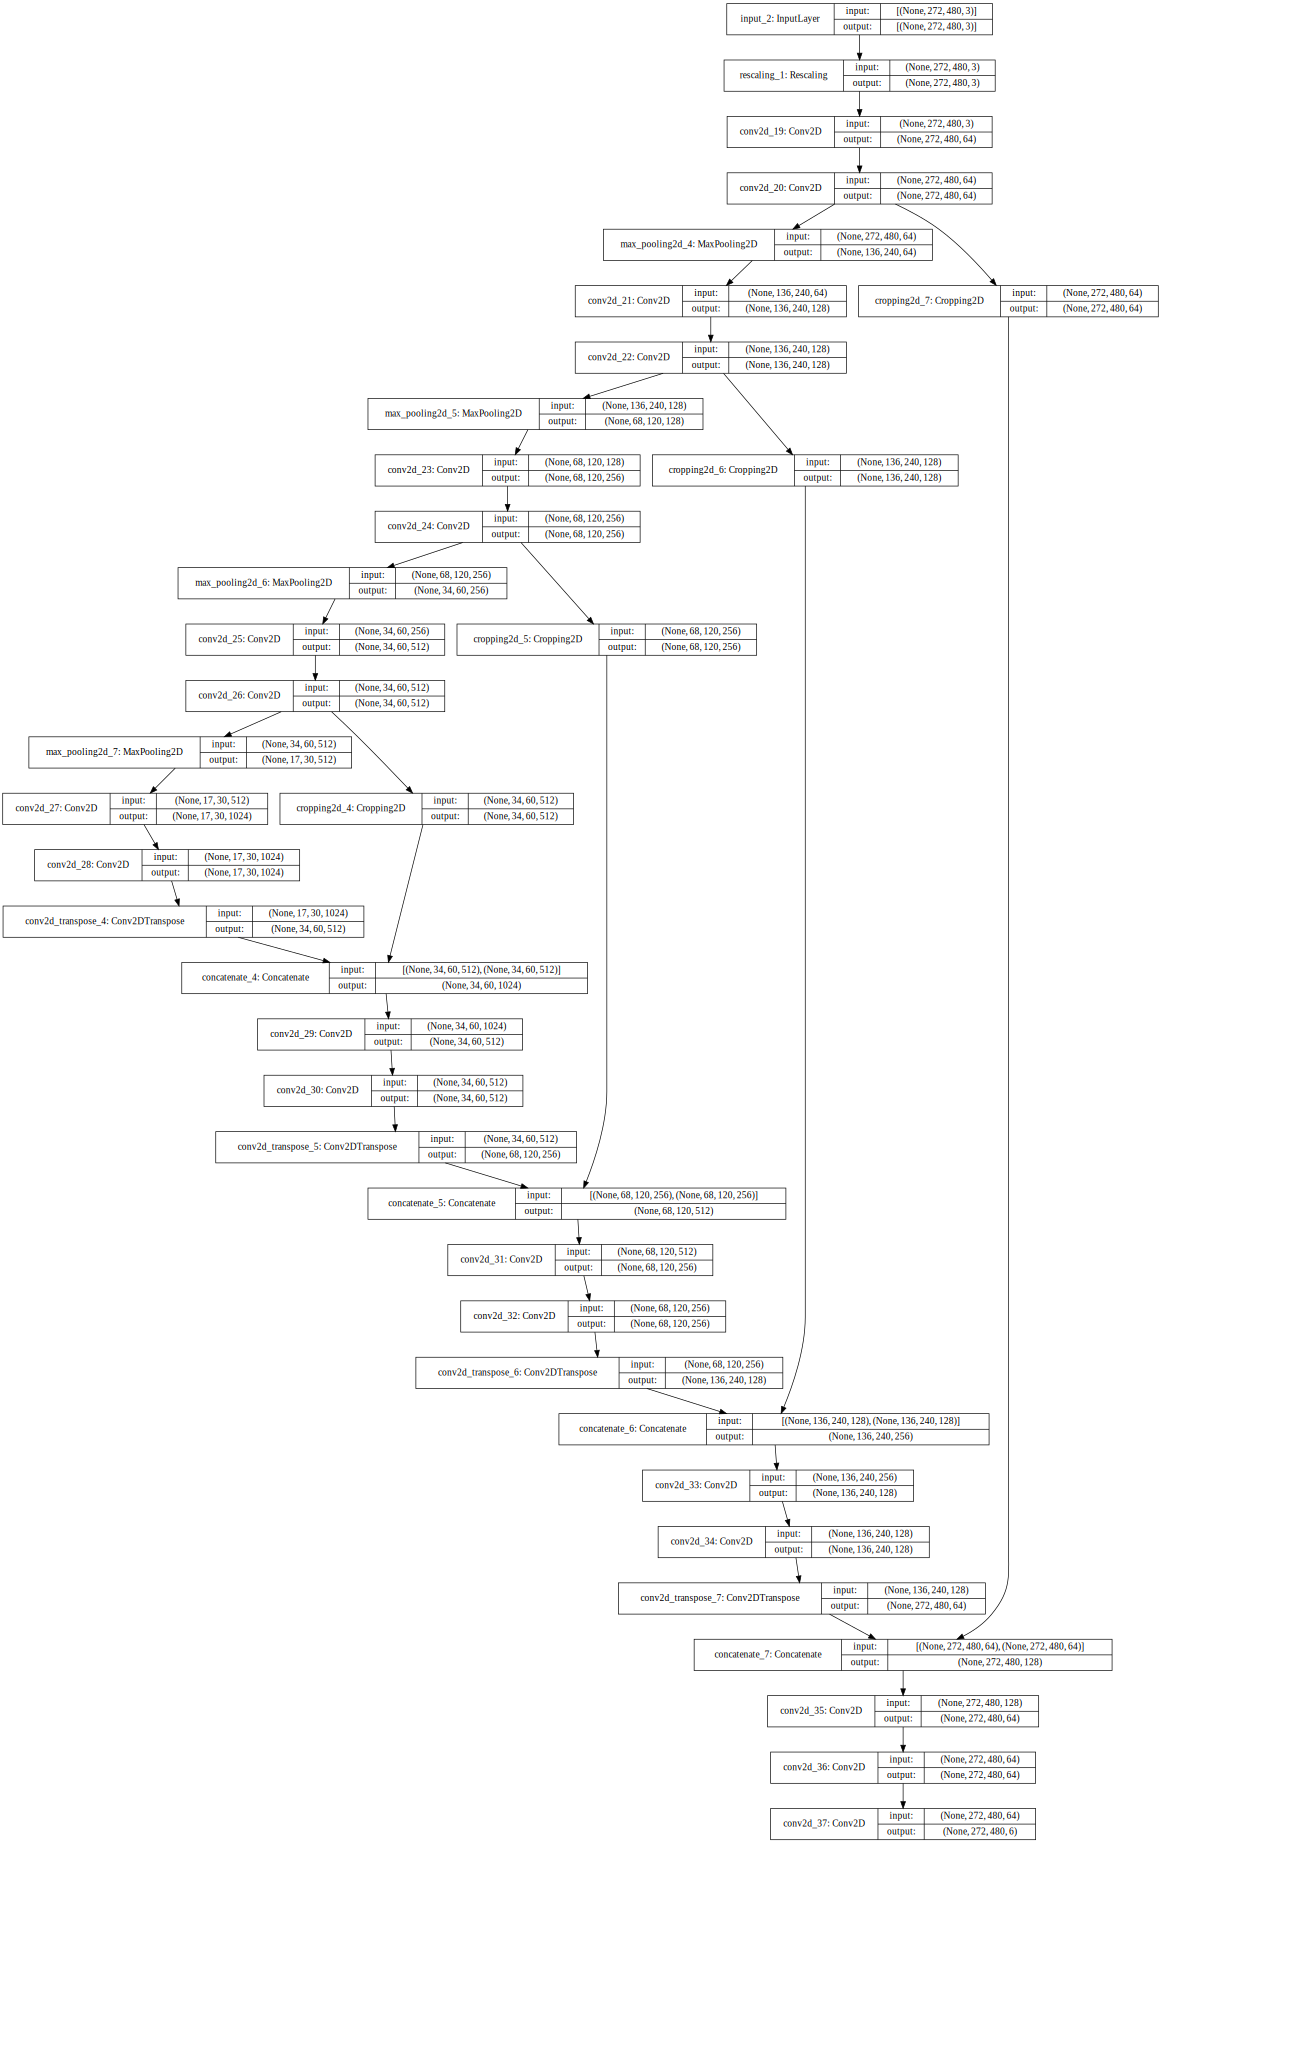

In [29]:
# visualize model structure
%matplotlib inline
SVG(model_to_dot(model, show_shapes= True, show_layer_names=True, dpi=80).create(prog='dot', format='svg'))  #dpi를 작게 하면 그래프가 커집니다.

---
## <span style = "background-color: #FFFFDD"> 🌃 Experiments</span>

### <span style = "background-color: #F0E9FF"> 1. Train the model with original (non-augmented) data</span>

**1-1. model training**

In [30]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [31]:
callbacks = [TensorBoard(log_dir="./log"),
             ModelCheckpoint("night_ride_segmentation.keras", save_best_only = True)]

In [32]:
history = model.fit(train_original_input_img,
                    train_original_target_img,
                    epochs = EPOCHS,
                    callbacks = callbacks,
                    batch_size = BATCH_SIZE,
                    validation_data = (val_original_input_img, val_original_target_img))

Epoch 1/10
8/8 [==============================] - 31s 4s/step - loss: 7443.7134 - accuracy: 0.3253 - val_loss: 1.6477 - val_accuracy: 0.2881
Epoch 2/10
8/8 [==============================] - 11s 1s/step - loss: 1.5427 - accuracy: 0.3915 - val_loss: 1.5187 - val_accuracy: 0.4464
Epoch 3/10
8/8 [==============================] - 11s 1s/step - loss: 1.4993 - accuracy: 0.4334 - val_loss: 1.6410 - val_accuracy: 0.4470
Epoch 4/10
8/8 [==============================] - 11s 1s/step - loss: 1.5129 - accuracy: 0.4300 - val_loss: 1.5011 - val_accuracy: 0.4460
Epoch 5/10
8/8 [==============================] - 11s 1s/step - loss: 1.4597 - accuracy: 0.4362 - val_loss: 1.5485 - val_accuracy: 0.4479
Epoch 6/10
8/8 [==============================] - 11s 1s/step - loss: 1.5199 - accuracy: 0.4336 - val_loss: 1.4564 - val_accuracy: 0.4456
Epoch 7/10
8/8 [==============================] - 11s 1s/step - loss: 1.4380 - accuracy: 0.4350 - val_loss: 1.4630 - val_accuracy: 0.4490
Epoch 8/10
8/8 [===============

**1-2. training result analysis**

In [34]:
def display_history(history):
    # get data
    # 첫번째 epoch에 대한 성능 수치가 과도하여 다음 epoch에 대한 성능의 비교가 어려워지므로, 첫번째 epoch에 관한 데이터는 제외
    epochs = range(2, len(history.history["loss"]) + 1)
    train_loss = history.history["loss"][1:]
    val_loss = history.history["val_loss"][1:]
    train_acc = history.history["accuracy"][1:]
    val_acc = history.history["val_accuracy"][1:]

    
    # draw loss graph
    fig = plt.figure(figsize = (15, 5))
    
    graph1 = plt.subplot(1, 2, 1)
    graph1.plot(epochs, train_loss, color="lightpink", label="training loss")
    graph1.plot(epochs, val_loss, color="hotpink", label="validation loss")
    graph1.set_title("Training & Validation Loss")
    graph1.legend()
    
    graph2 = plt.subplot(1, 2, 2)
    graph2.plot(epochs, train_acc, color="lightpink", label="training loss")
    graph2.plot(epochs, val_acc, color="hotpink", label="validation loss")
    graph2.set_title("Training & Validation Accuracy")
    graph2.legend()
    
    fig.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


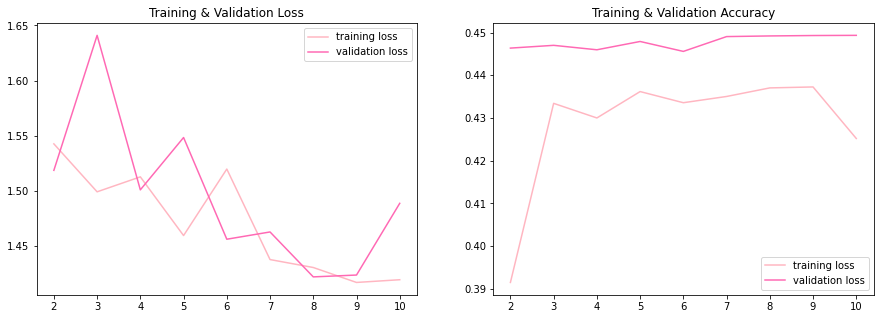

In [35]:
print(history.history.keys())
display_history(history)

**1-3. training result analysis using TensorBoard**

In [36]:
%load_ext tensorboard
%tensorboard --logdir log

LMS 상에서는 tensorboard 사용이 원활하지 않은 것 같다
따로 실행할 수 있는 방법을 찾아봐야 할 것 같지만, 시간 관계상 일단 패스

### <span style = "background-color: #F0E9FF"> 2. Train the model with augmented data</span>

In [33]:
# implement here later ...

---
## <span style = "background-color: #FFFFDD"> 🌃 Evaluation</span>

### <span style = "background-color: #F0E9FF"> 1. Test the model with original (non-augmented) data</span>

**1-1. loss & accuracy evaluation for test data**

In [37]:
# load best trained model
best_model = models.load_model("night_ride_segmentation.keras")
print("The best trained model loaded successfully!")

The best trained model loaded successfully!


In [38]:
loss, accuracy = best_model.evaluate(test_original_input_img, test_original_target_img)

print(">>> loss      : ", loss)
print(">>> accuracy  : ", accuracy)    

2/2 [==============================] - 26s 287ms/step - loss: 1.4133 - accuracy: 0.4329
>>> loss      :  1.413338541984558
>>> accuracy  :  0.4329419434070587


시간 관계상 augmentation 없이 원본 데이터 그대로 적은 EPOCHS 로 학습하였고, 메모리 관계상 적은 BATCH_SIZE로 학습 했음에도 불구하고 40% 정도의 정확도면 무난한 것 같다. 좀 더 학습 환경이 수월했으면 더 잘해낼 수 있었을 것이다 🥸

**1-2. prediction & preview for data input data**

In [39]:
pred_original_img = best_model.predict(test_original_input_img)

In [49]:
def preview_and_compare(input_img, target_img, pred_img, preview_cnt):
    if len(input_img) == len(target_img) and len(target_img) == len(pred_img):
        total_samples_cnt = len(input_img)

        for cnt in range(preview_cnt):
            # get random sample number
            rand_idx = random.randint(0, total_samples_cnt -1)    

            fig = plt.figure(figsize=(15, 5))

            # preview of "original" image
            ax1 = plt.subplot(1, 3, 1)
            ax1.imshow(input_img[rand_idx] / 255)
            ax1.set_title("original")
            ax1.axis("off")

            # preview of "segmented" image
            ax2 = plt.subplot(1, 3, 2)
            ax2.imshow(target_img[rand_idx])
            ax2.set_title("segmented")
            ax2.axis("off")

            # preview of "merged" image
            ax3 = plt.subplot(1, 3, 3)
            ax3.imshow(np.argmax(pred_img[rand_idx], axis=-1))
            ax3.set_title("predicted")
            ax3.axis("off")

            fig.show()
            
    else:
        print("ERROR: The pairs of input, target, and predicted images are not match!!!")

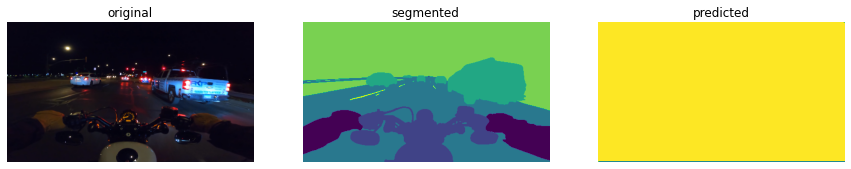

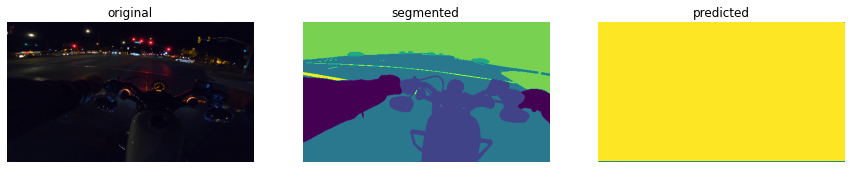

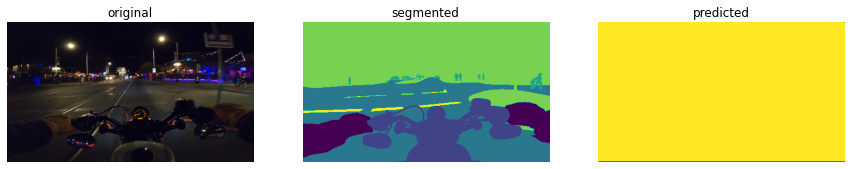

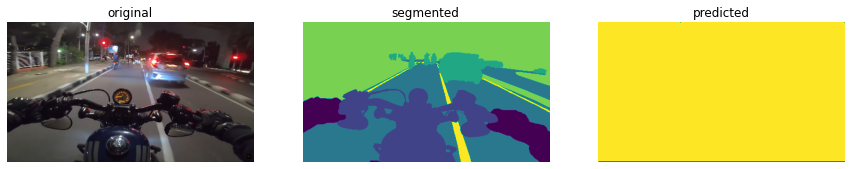

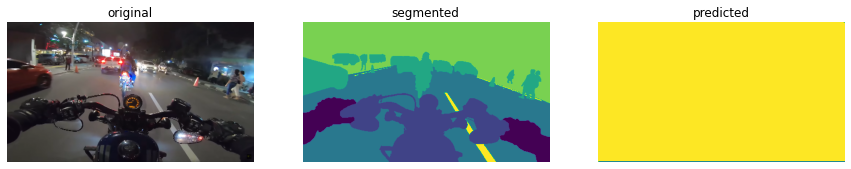

In [50]:
preview_and_compare(test_original_input_img, test_original_target_img, pred_original_img, 5)

### <span style = "background-color: #F0E9FF"> 2. Test the model with augmented data</span>

In [ ]:
# implement here later ...

---
## <span style = "background-color: #FFFFDD"> 🌃 Conclusion</span>

### <span style = "background-color: #F0E9FF"> 📝 Research Note</span>

- 케창딥 책에서 예시로 살펴보았던 class number로 표시된 데이터와 달리, 실제 색상으로 구분된 데이터를 사용하였기에 데이터 전처리에도 시간이 조금 필요하였다 (데이터 전처리가 필요하다는 사실을 너무 늦게 깨달았다!) 
- U-net 을 설계하는 과정에서 skip connection을 위한 vector size를 맞추는 것이 너무 어려웠다. 어찌저찌 맞추긴 했지만, 이게 맞는 방법이였는지는 모르겠다
- 시간 관계상, 메모리 관계상 못 해본 것들이 너무 많아 아쉽다 ㅠㅠ 이번 퀘스트는 제출에만 의의를 두고, 다음에 좀 더 자습을 해봐야겠다 😰😰

### <span style = "background-color: #F0E9FF"> 📝 References</span>

- **U-net 모델 구조의 제안**
  - LONG, Jonathan; SHELHAMER, Evan; DARRELL, Trevor. Fully convolutional networks for semantic segmentation. In: Proceedings of the IEEE conference on computer vision and pattern recognition. 2015. p. 3431-3440.
  - RONNEBERGER, Olaf; FISCHER, Philipp; BROX, Thomas. U-net: Convolutional networks for biomedical image segmentation. In: Medical Image Computing and Computer-Assisted Intervention–MICCAI 2015: 18th International Conference, Munich, Germany, October 5-9, 2015, Proceedings, Part III 18. Springer International Publishing, 2015. p. 234-241.
- **`tensorflow.keras`를 이용한 U-net 구현 아이디어 참조**
  - https://keras.io/examples/vision/oxford_pets_image_segmentation/

---